# Chapter 3: Descriptive Statistics
This notebook is about descriptive statistics and comprises concepts, terms, measures and toool to help describe, show and summarize the data in a meaningful way. When analysing data, such as the price of flats per year, it is possible to use both descriptive and inferential statistics in order to analyse the results and draw some conclusions. This notebook will discuss basic concepts like mean, median, variance, correlation, etc. to explore, describe and summarize a given dataset.

Statistics is based on main 2 concepts:
* A __population__ is a collection of objects, items ("units") about which information is sought.
* A __sample__ is a part of the population that is observed.

## 1.1 The Dataset
__"Are men more likely to become high-income professionials i.e. to receive an income bigger than USD 50K?"__

Let's consider a public dataset called "Adult" hosted on the [UCI's Machine Learning Repositoriy](https://archive.ics.uci.edu/ml/datasets/Adult), that contains approximately 32.000 observations about different financial and demographic parameters of US population.

## 1.2 Data Preparation
One of the reasons we are using a general-purpose language such as Python rather than a stats language like R is that for many projects, the hard part is preparing the data, not the analysis.

The most common steps of data preparation are:
1. __Getting the data.__ Data can be directly read from almost any file in Python or, if necessary, it can be scrapped from the web.
2. __Parsing the data.__ This dependds on what format the data is in: plain text, fixed columns, CVS, XML, HTML, etc.
3. __Cleaning the data.__ Survey responses and other data files are almost alaways incomplete. Sometimes there are multiple codes for instances that mean the same, e.g. _not asked, did not know,_ or _declined to answer._ Likewise spelling mistakes make two different entities out of the very same object. There are almost always errors and missing data. A simple strategy is to remove either rows or columns with incomplete records. Other strategies aim to replace missing or erroneous data.
4. __Building data structures.__ Once you read the data, you usually want to store it in a data structure that lends itself to the analysis you want to do. If the data fits into memory, building a data structure is usually the way to go. If not, you could build a database, which is an out-of-memory data structure. Most databases provide a mapping from keys to values, so they are like dictionaries.

In [ ]:
!wget -O adult.data https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch03/adult.data
print('Download complete!')

## 1.3 Importing the Dataset
Read the dataset into memory. Split the lines into `int` or `str` using `', '` as delimiter. This will help to read the dataset into Pandas DataFrame.

In [1]:
file = open('adult.data', 'r')

In [2]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return(0)
    
data=[]
for line in file:
    data1=line.split(', ')
    if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

In [3]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [4]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['age','type_employer','fnlwgt','education','education_num',
             'marital','occupation','relationship','race','sex','capital_gain',
             'capital_loss','hr_per_week','country','income']
df.head(10)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K\n
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K\n
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n


In [5]:
df.tail()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K\n


In [6]:
df.shape

(32561, 15)

Count the number of items (i.e. adults) per country:

In [7]:
counts = df['country'].value_counts()
print(counts)

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

Count the number of items by age:

In [8]:
age = df['age'].value_counts()
age

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

Create a DataFrame `male` that only includes all male adults.
Create another DataFrame `male_50k` that only inlcudes all male, high-income adults. 

In [9]:
male = df[df.sex=='Male']
male.shape

(21790, 15)

In [10]:
male_50k = df[(df.sex=='Male')&(df.income=='>50K\n')]
male_50k.shape

(6662, 15)

Do same for women, calling the DataFrames `female` and `female_50k`.

In [11]:
female = df[df.sex=='Female']
female.shape

(10771, 15)

In [12]:
female_50k = df[(df.sex=='Female') & (df.income=='>50K\n')]
female_50k.shape

(1179, 15)

Compute the percentage all people with high income, of men with high income, and women with high income.

In [13]:
df1=df[(df.income=='>50K\n')]
print('The rate of people with high income is', int(len(df1)/float(len(df))*100), '%.')
print('The rate of men with high income is', int(len(male_50k)/float(len(male))*100), '%.')
print('The rate of women with high income is', int(len(female_50k)/float(len(female))*100), '%.')

The rate of people with high income is 24 %.
The rate of men with high income is 30 %.
The rate of women with high income is 10 %.


## 1.4 Data Cleaning
The most common steps are:
* __Sample the data.__ If the amount of raw data is huge, processing all of the may require an extensive amount of processing power and time, which may not be practical. In this case, it is common to sample the input data to reduce the size of data that need to be processed.
* __Impute missing data.__ As mentioned before, it is also common that some input records are incomplete in the sense that certain fields are missing or have an input error. In a typical tabular data format, we need to validate each record contains the same number of fields and field contains the data type we expect. In case the record has some fields missing, we have the following choices:
    - (a) Discard the whole record (row or column) if it is incomplete;
    - (b) Infer the missing value based on the data from other records. A common approach for continuous missing data is to fill it with average or median. Missing categorical data could be filled with the mode.
* __Normalize numeric values.__ Normalizing data is about transforming numeric data into a uniform range (e.g. this is import for distance-based algorithms).
* __Reduce dimensionality.__ High dimensionality can be a problem for some machine learning methods. There are two ways to reduce the number of input features. One is about _removing irrelevant_ input variables, another one is about _removing redundant_ input variables.
* __Add derived features.__ In some cases, we may need to compute additional attributes from existing attributes (.e.g converting zip code into a geo-location).
* __Discrete numeric values into categories.__ Discretizing data is about cutting continuous values into ranges and assigning the numeric with the corresponding bucket of the range it falls on. For numeric attributes, a common way to generalize it is to discretize it into ranges, which can be either constant width (height/frequency) or variable width (height).
* __Binarize categorial attributes.__ Certain machine learning models only take binary input (or numeric input). In this case, we need to convert categorical attributes into multiple binary attributes, while each binary atrtibute corresponds to a particular value of the category.
* __Select, combine, aggregate data.__ Designing the form of training data is the most important part of the whole predictive modelling exercise because the accuracy largely depends on whether the input features are structured in an appropriate form that provide strong signals to the learning algorithm. Rather than using raw data as it is, it common that multiple pieces of raw data need to be combined together, or aggregating multiple raw data records along some dimension. 

## 2.1 Summarizing Data
__Sample Mean__

The mean is the most basic and important summary statistic. It describes the central tendency of a sample. The sample mean is the sum of all values divided by the number of values:

$ \mu = \frac{1}{n} \sum^{n}_{i=1} x_i$

In [14]:
print('The average age of men is %.2f' % male['age'].mean())
print('The average age of women is %.2f' % female['age'].mean())

The average age of men is 39.43
The average age of women is 36.86


In [15]:
print('The average age of high-income men is %.2f' % male_50k['age'].mean())
print('The average age of high-income women is %.2f' % female_50k['age'].mean())

The average age of high-income men is 44.63
The average age of high-income women is 42.13


__Sample Variance and Standard Deviation__

Usually, the mean is not sufficient descriptor of the data, we can do a little better with two numbers:

Variance $\sigma^2$ describes the spread of data:

$\sigma^2 = \frac{1}{n} \sum^n_i=1 (x_i - \mu)^2$

The square root of variance, $\sigma$, is called the standard deviation. We define standard deviation because variance is hard to interpret (in the case the units are grams, the variance is in grams squared). 

$\sigma = \sqrt{ \frac{1}{n} \sum^n_i=1 (x_i - \mu)^2}$

Let's get the basic statistics for our example data:

In [16]:
# sample variance
ml_mu = male['age'].mean()
fm_mu = female['age'].mean()
ml_var = male['age'].var()
fm_var = female['age'].var()
ml_std = male['age'].std()
fm_std = female['age'].std()
print('Sample stats for age of men: mu:', ml_mu, 'var:', ml_var, 'std:',ml_std)
print('Sample stats for age of wommen: mu:', fm_mu, 'var:', fm_var, 'std:',fm_std)

Sample stats for age of men: mu: 39.43354749885268 var: 178.77375174529985 std: 13.370630192526448
Sample stats for age of wommen: mu: 36.85823043357163 var: 196.3837063948063 std: 14.013697099438332


In [17]:
ml_mu_hr = male['hr_per_week'].mean()
fm_mu_hr = female['hr_per_week'].mean()
ml_var_hr = male['hr_per_week'].var()
fm_var_hr = female['hr_per_week'].var()
ml_std_hr = male['hr_per_week'].std()
fm_std_hr = female['hr_per_week'].std()
print('Statistics of hours per week for men: mu:', ml_mu_hr, 'var:', ml_var_hr, 'std:', ml_std_hr)
print('Statistics  of hours per week for women: mu:', fm_mu_hr, 'var:', fm_var_hr, 'std:', fm_std_hr)

Statistics of hours per week for men: mu: 42.42808627810923 var: 146.88846717140746 std: 12.11975524387384
Statistics  of hours per week for women: mu: 36.410361154953115 var: 139.50679700047422 std: 11.811299547487323


__Sample Median__

The statistical median is an order statistic that gives the middle value of a sample. It is a value more robust to ouliers.

In [18]:
# sample median
ml_median = male['age'].median()
fm_median = female['age'].median()
print('Median age of men and women is', ml_median, 'and', fm_median)

ml_median_50 = male_50k['age'].median()
fm_median_50 = female_50k['age'].median()
print('Median age of high-income men and women is', ml_median_50, 'and', fm_median_50)

Median age of men and women is 38.0 and 35.0
Median age of high-income men and women is 44.0 and 41.0


In [19]:
ml_median_hr= male['hr_per_week'].median()
fm_median_hr= female['hr_per_week'].median()
print ("Median hours per week per men and women: ", ml_median_hr, 'and', fm_median_hr)

Median hours per week per men and women:  40.0 and 40.0


__Quantiles and Percentiles__

Sometimes we are interested in observing how sample ata are distributed in general. In this case, we can order the samples $x_i$, then find the $x_p$ so that it divides the data into two parts, where:
* a fraction $p$ of the value is less than or equal to $x_p$ and
* the remaining fraction $(1-p)$ is greater than $x_p$.

The value, $x_p$, is the _p-th_ quantile, or the 100 x _p-th_ percentile. For example, a 5-number summary is defined by the vales $x$<sub>min</sub>$, Q_1, Q_2, Q_3, x$<sub>max</sub>, where $Q_1$ is the 25 x _p-th_ percentile, $Q_2$ 50 x _p-th_ percentile, and $Q_3$ is the 75 x _p-th_ percentile.

## 2.2 Histogram
The most common representation of a distribution is a __histogram__, which is a graph that shows the frequency of each value. Let's visualise the histogram for the age of the male and female populations in our example:

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

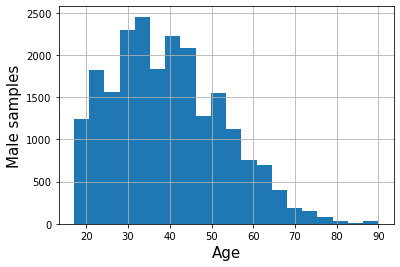

In [21]:
ml_age=male['age']
ml_age.hist(density=False, histtype='stepfilled', bins=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Male samples', fontsize=15)
plt.show();

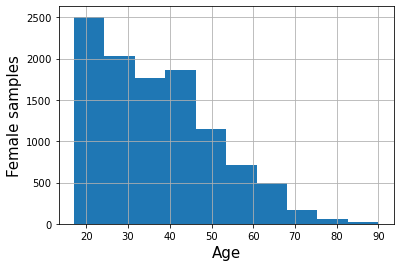

In [22]:
fm_age=female['age']
fm_age.hist(density=False, histtype='stepfilled', bins=10)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Female samples', fontsize=15)
plt.show();

Let's compare both populations by overlaying the distributions:

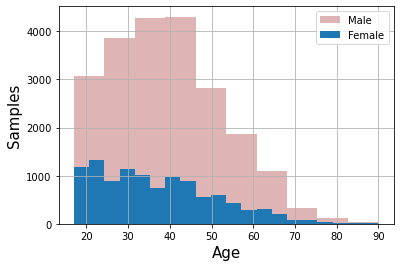

In [23]:
import seaborn as sns
ml_age.hist(density=False, histtype='stepfilled', alpha=.5, color=sns.desaturate('indianred', .75), bins=10)
fm_age.hist(density=False, histtype='stepfilled', bins=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.legend(('Male','Female'))
plt.show();

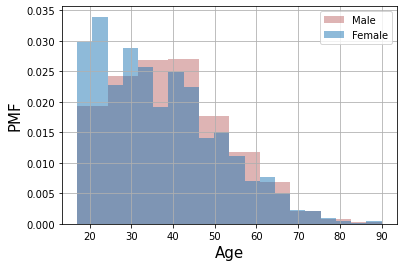

In [24]:
ml_age.hist(density=True, histtype='stepfilled', alpha=.5, color=sns.desaturate('indianred', .75), bins=10)
fm_age.hist(density=True, histtype='stepfilled', alpha=.5, bins=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('PMF', fontsize=15)
plt.legend(('Male','Female'))
plt.show();

## 2.3 Distribution Functions
Summarizing can be dangerious: very different data can be described by the same summary statistics. It must be validated by inspecting the data. We can look at the __data distribution__, which describes how often (frequency) each value appears. 

We can normalize the frequencies of the histogram by dividing/normalizing $n$, the number of samples. The normalized histogram is called __Probability Mass Function__ (PMF).

Let's visualise and compare the PMF of male and female age in our example:

In [25]:
import scipy.stats as stats

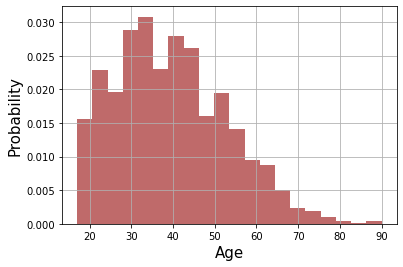

In [26]:
ml_age.hist(density=True, histtype='stepfilled', bins=20, color=sns.desaturate('indianred', .75))
plt.xlabel('Age', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show();

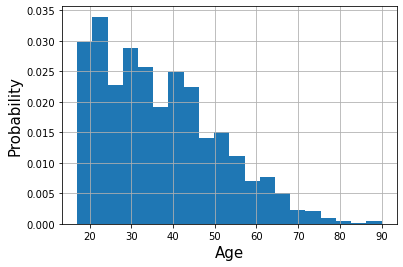

In [27]:
fm_age.hist(density=True, histtype='stepfilled', bins=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show();

The __cumulative distribution function__ (CDF), or just distribution function, describes the probability that a real-valued random variable $X$ with a given probablity distribution will be found to habe a value less than or equal to $x$. For our example, the CDFs will be:

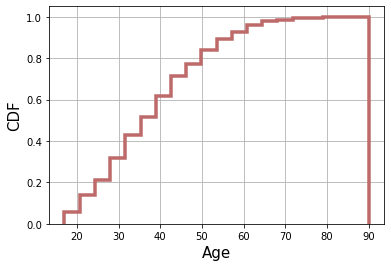

In [28]:
ml_age.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=20, color=sns.desaturate('indianred', .75))
plt.xlabel('Age', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show();

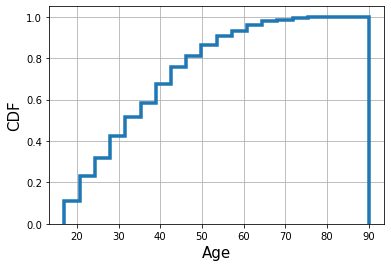

In [29]:
fm_age.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.show();

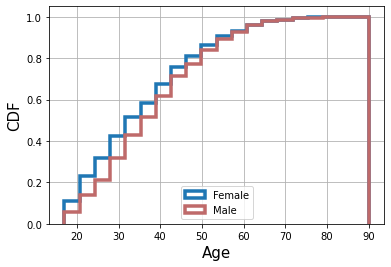

In [30]:
fm_age.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=20)
ml_age.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=20, color=sns.desaturate('indianred', .75))
plt.xlabel('Age', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.legend(('Female', 'Male'), loc='lower center')
plt.show();

In [31]:
import numpy as np
print('The mean sample difference is', np.round(ml_age.mean()-fm_age.mean(), 4))

The mean sample difference is 2.5753


## 2.4 Outliers
Outliers are data points with a value that is far from the central tendency.
We can find outliers by:
* Computing samples that are _far_ from the median. Any observations that are more than 1.5 x IQR below $Q_1$ or more than 1.5 x IQR above $Q_3$ are considered outliers.
* Comptuing samples whose value _exceeds the mean_ by 2 or 3 standard deviations.

(I am not entirely sure how the original authors derived 15 below the median or 35 above the median as their critical cut-off, since it doesn't strictly correspond to any of these 2 rules.) 

In [32]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [33]:
len(df[(df.income == '>50K\n') & (df['age'] < df['age'].median() - 15)])

5

In [34]:
len(df[(df.income == '>50K\n') & (df['age'] > df['age'].median() + 35)])

69

If we think that outliers correpsond to errors, an option is to trim the data by removing the highest and lowest values.

In [35]:
df2 = df.drop(df.index[(df.income=='>50K\n') & (df['age']>df['age'].median()+35) & (df['age']>df['age'].median()-15)])
print(df.shape)
print(df2.shape)

(32561, 15)
(32492, 15)


In [39]:
male_50k_age = male_50k['age']
female_50k_age = female_50k['age']

male_50k_age2 = male_50k_age.drop(male_50k_age.index[(male_50k_age>df['age'].median()+35)&(male_50k_age>df['age'].median()-15)])
female_50k_age2 = female_50k_age.drop(female_50k_age.index[(female_50k_age>df['age'].median()+35)&(female_50k_age>df['age'].median()-15)])

In [37]:
mu2ml = male_50k_age2.mean()
std2ml = male_50k_age2.std()
md2ml = male_50k_age2.median()
print('Men statistics: Mean:', mu2ml,'Std:',std2ml,'Median',md2ml,'Min:',male_50k_age2.min(),'Max:',male_50k_age2.max())

Men statistics: Mean: 41.877028181041844 Std: 10.036441807343707 Median 41.0 Min: 19 Max: 72


In [40]:
mu2fm = female_50k_age2.mean()
std2fm = female_50k_age2.std()
md2fm = female_50k_age2.median()
print('Women statistics: Mean:', mu2fm,'Std:',std2fm,'Median',md2fm,'Min:',female_50k_age2.min(),'Max:',female_50k_age2.max())

Women statistics: Mean: 41.877028181041844 Std: 10.036441807343707 Median 41.0 Min: 19 Max: 72


In [41]:
print('Mean difference with outliers is', np.round((ml_age.mean()-fm_age.mean()),2))
print('Mean difference without outliers is', np.round((male_50k_age2.mean()-female_50k_age2.mean()),2))

Mean difference with outliers is 2.58
Mean difference without outliers is 2.44


Let's compare visually the age distribution before and after removing the outliers.

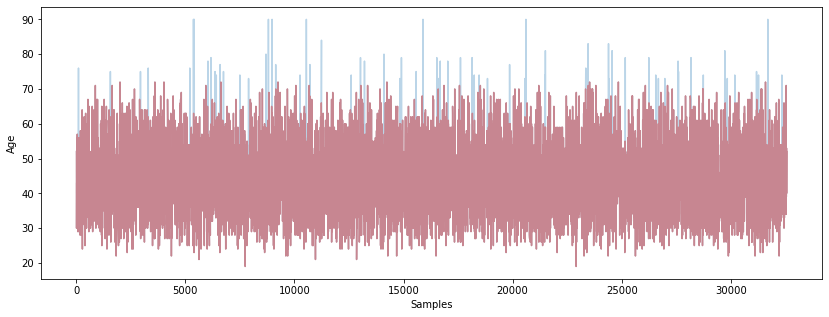

In [42]:
plt.figure(figsize=(14,5))
df.age[(df.income=='>50K\n')].plot(alpha=.3,color='tab:blue')
df2.age[(df2.income=='>50K\n')].plot(alpha=.45,color='tab:red')
plt.ylabel('Age')
plt.xlabel('Samples')
plt.show();

In [43]:
import numpy as np

countx,divisionx = np.histogram(male_50k_age2, density=True)
county,divisiony = np.histogram(female_50k_age2, density=True)

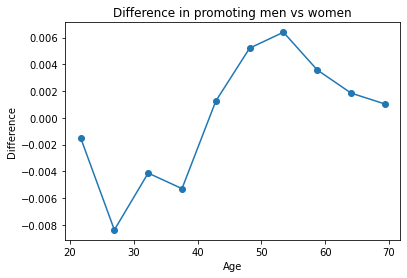

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

val = [(divisionx[i]+divisiony[i+1])/2 for i in range (len(divisionx)-1)]
plt.plot(val,countx-county, 'o-')
plt.title('Difference in promoting men vs women')
plt.xlabel('Age')
plt.ylabel('Difference')
plt.show();

We can also compare and visualise the difference of being promoted to high-income between the share of men vs women by age. As can be seen above, women are more likely to be promoted before the age of 40-something, while men are more likely to be promoted after their early 40s.

## 2.5 Measuring asymmetry or skewness
__Skewness__ is a statistic that measures the asymmertry of a set of $n$ data samples $x_i$.

The numerator is the mean squared deviation (or variance) and the denominator the mean cubed deviation.

Negative deviation indicates that the distribution "skews left" (it extends farther to the left than to the right).

$g_1 = \frac{\frac{1}{n} \sum_i (x_i - \mu)^2 }{\frac{1}{n} \sum_i (x_i - \mu)^3 } $

In [45]:
def skewness(x):
    res=0
    m=x.mean()
    s=x.std()
    for i in x:
        res+=(i-m)*(i-m)*(i-m)
    res/=(len(x)*s*s*s)
    return res

In [46]:
print('The skewness of male population is', skewness(male_50k_age2))
print('The skewness of female population is', skewness(female_50k_age2))

The skewness of male population is 0.26644438384328223
The skewness of female population is 0.3863335249128606


__Pearson's Median Skewness Coefficient__ is more robust alternative:

$g_p = \frac{3(\mu - \tilde{x})}{\sigma}$

where $\tilde{x}$ is the median.

In [47]:
def pearson_skew(x):
    g = 3*(x.mean()-x.median())/x.std()
    return g

In [48]:
print('The Pearson median skewness of male population is', pearson_skew(male_50k_age2))
print('The Pearson median skewness of female population is', pearson_skew(female_50k_age2))

The Pearson median skewness of male population is 0.09520660549016392
The Pearson median skewness of female population is 0.2621531209596967


## 2.6 Relative Risk
Let's say that a person is "early" promoted if he/she is promoted before the age of 41, "on time" if he/she is promoted of age 41, 42, 43 or 44, and "late" promoted if he/she is ascended to get income bigger than 50K after being 44 years old.

Let's compute the probability of being early, on time and late promoted for men and women:

In [49]:
print(male_50k_age2.shape, female_50k_age2.shape)

(6601,) (1171,)


In [50]:
print('Men grouped in 3 categories')
print('Young:', int(round(100*len(male_50k_age2[male_50k_age2<41])/float(len(male_50k_age2.index)))),'%.')
print('Elder:', int(round(100*len(male_50k_age2[male_50k_age2>44])/float(len(male_50k_age2.index)))),'%.')
print('Average:', int(round(100*len(male_50k_age2[(male_50k_age2>40)&(male_50k_age<45)])/float(len(male_50k_age2.index)))),'%.')

Men grouped in 3 categories
Young: 38 %.
Elder: 48 %.
Average: 14 %.


In [51]:
print('Women grouped in 3 categories')
print('Young:', int(round(100*len(female_50k_age2[female_50k_age2<41])/float(len(female_50k_age2.index)))),'%.')
print('Elder:', int(round(100*len(female_50k_age2[female_50k_age2>44])/float(len(female_50k_age2.index)))),'%.')
print('Average:', int(round(100*len(female_50k_age2[(female_50k_age2>40)&(female_50k_age<45)])/float(len(female_50k_age2.index)))),'%.')

Women grouped in 3 categories
Young: 48 %.
Elder: 37 %.
Average: 15 %.


The relative risk is the ratio of two probabilities. In order to get the relative risk of early promotion, we need to consider the fraction of both probabilities.

In [52]:
print('Male mean:', male_50k_age2.mean())
print('Female mean:', female_50k_age2.mean())

Male mean: 44.317982123920615
Female mean: 41.877028181041844


In [53]:
ml_young = len(male_50k_age2[(male_50k_age2<41)])/float(len(male_50k_age2.index)) # pecentage of men under 41 from all high-income men
fm_young = len(female_50k_age2[(female_50k_age2<41)])/float(len(female_50k_age2.index)) # pecentage of women under 41 from all high-income women
print('The relative risk of female early promotion is', 100*(1-ml_young/fm_young))

The relative risk of female early promotion is 21.125440082163816


This means that women are 21% more likely to get promoted before 41 years than men.

In [54]:
ml_elder = len(male_50k_age2[(male_50k_age2>44)])/float(len(male_50k_age2.index))
fm_elder = len(female_50k_age2[(female_50k_age2>44)])/float(len(female_50k_age2.index))
print('The relative risk male late promotion is', (100*ml_elder/fm_elder)-100)

The relative risk male late promotion is 28.971570897124195


This mean that men are 29% more likely to get promoted after 44 years than women.

__Summary__
* _Data Description:_ The mean age for ascending male professionals is 44 years old, while for female profressionals it is 41 years.
* _Relative Risk:_ Female professionals are 21% more likely to be promoted before 41 years of age, while men are 29% more likely to be promoted at least 45 years old.

## 3. Continuous Distributions
So far, we have built __empirical dsitributions__ (which represent the distribution of values in a sample), based on observations, but many real problems are well approximated by fitting __continuous distribution functions__ (CDFs).

## 3.1 The Exponential Distribution

The CDF of the exponential distribution is:

$CDF(x) = 1-\exp$ <sup>-$\lambda x$</sup>

And it PDF is:

$PDF(x) = \lambda \exp$ <sup>-$\lambda x$</sup>

The parameter $\lambda$ determines the shape of the distribution, the mean of the distribution is $\frac{1}{\lambda}$ and its variance is $\frac{1}{\lambda^2}$. The median is $\frac{ln(2)}{\lambda}$ 

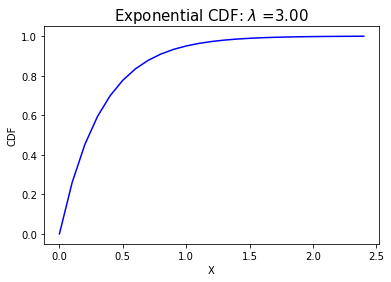

In [55]:
l = 3
x = np.arange(0,2.5,0.1)
y = 1 - np.exp(-l*x)
plt.plot(x,y,color='b')
plt.title('Exponential CDF: $\lambda$ =%.2f' %l, fontsize=15)
plt.xlabel('X')
plt.ylabel('CDF')
plt.show();

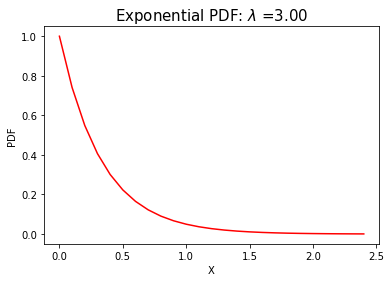

In [56]:
l = 3
x = np.arange(0,2.5,0.1)
y = 1 * np.exp(-l*x)
plt.plot(x,y,color='r')
plt.title('Exponential PDF: $\lambda$ =%.2f' %l, fontsize=15)
plt.xlabel('X')
plt.ylabel('PDF')
plt.show();

There are a lot of real world events that can be described with this distribution.
* The time until a radioactive particle decays,
* The time it takes before your next telephone call,
* The time until default (on payment to company debt holders) in reduced form credit risk modeling.

The random variable $X$ of the lifelength of some batteries is associated with probability density function of the form:

$PDF(x) = \frac{1}{4} \exp$ <sup>$-\frac{x}{4}$</sup>

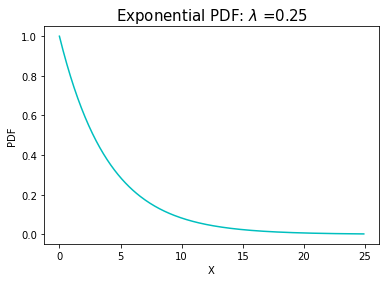

In [57]:
l = 0.25
x = np.arange(0,25,0.1)
y = 1 * np.exp(-l*x)
plt.plot(x,y,color='c')
plt.title('Exponential PDF: $\lambda$ =%.2f' %l, fontsize=15)
plt.xlabel('X')
plt.ylabel('PDF')
plt.show();

## 3.2 Normal Distribution

The __normal__ or __Gaussian distribution__ is the most used one because it describes a lot of phenomena in the real world and because it is amenable for analysis.

Its CDF has no closed-form expression and its common representation is the PDF:

$PDF(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp(-\frac{(x-\mu)^2}{2\sigma^2})$

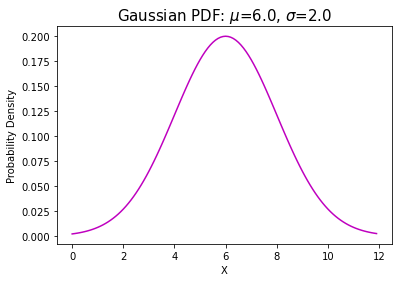

In [58]:
# normal or Gaussian distribution
u = 6 # mean
s = 2 # standard deviation
x = np.arange(0,12,0.1)
y = (1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,color='m')
plt.title('Gaussian PDF: $\mu$=%.1f, $\sigma$=%.1f' %(u,s), fontsize=15)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.show();

## 3.3 Central Limit Theorem

The normal distribution is also important, because it is involved in the Central Limit Theorem:

Take the mean of $n$ random samples from ANY arbitrary distribution with a _well defined_ standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the distribution of the sample mean will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Colloquially speaking, the theorem states the distribution of an average tends to be normal, even when the distribution from which the average is computed is decidedly non-normal. This explains the ubiquity of the Gaussian distribution in science and statistics.

__Uniform Distribution__

The uniform distribution is _non-normal_. Let's call it the _parent distribution_.

To compute an average, two samples are drawn ($n=2$), at random, from the parent distribution and averaged. Then another sample of two ($n=2$) is drawn and another value of the average computed. This process is repeated, over and over, and averages of two are computed.

Repeatedly taking more elements ($n = 3,4,...$) from the parent distribution, and computing the averages, produces a normal probability density.

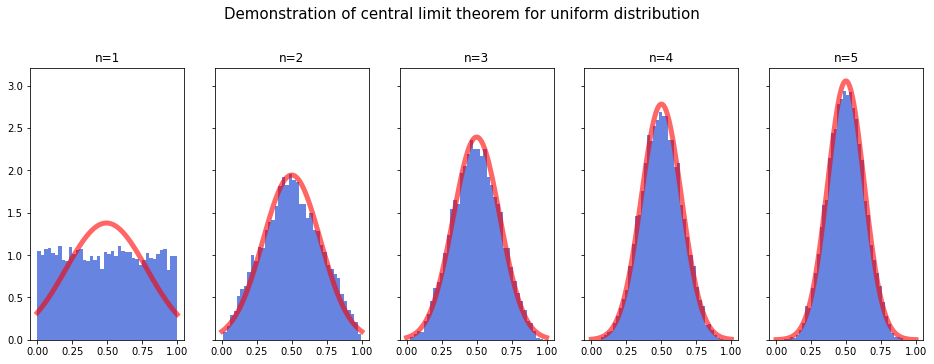

In [59]:
fig, ax = plt.subplots(1, 5, sharey=True, squeeze=True, figsize=(16,5))
x = np.linspace(0,1,100)
for i in range(5):
    f = np.mean(np.random.random((10000, i+1)), 1)
    m, s, = np.mean(f), np.std(f, ddof=1)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))
    ax[i].hist(f, 40, density=True, color=[0,0.2,0.8,0.6])
    ax[i].set_title('n=%d' %(i+1))
    ax[i].plot(x, fn, color=[1,0,0,0.6], linewidth=5)
plt.suptitle('Demonstration of central limit theorem for uniform distribution', y=1.05, fontsize=15)
plt.show();

## 3.4 Kernel Density Estimates
In some instances, we may not be interested in the parameters of a particular distribution of data, but just a __continuous representation__ of the data at hand. In this case, we can estimate the distribution non-parametrically (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

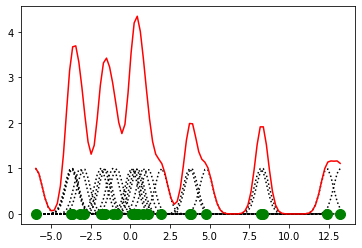

In [60]:
from scipy.stats.distributions import norm

x1 = np.random.normal(-1,2,15)
x2 = np.random.normal(6,3,10)
y = np.r_[x1,x2]
x = np.linspace(min(y),max(y),100)

s = 0.4 # smoothing

kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'go', ms=10);

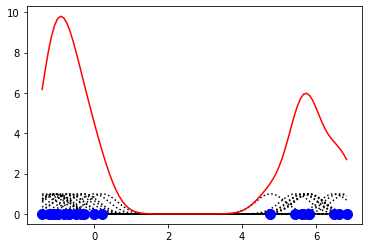

In [61]:
from scipy.stats import kde

x1 = np.random.normal(-1,0.5,15)
x2 = np.random.normal(6,1,10)
y = np.r_[x1,x2]
x = np.linspace(min(y),max(y),100)
s=0.4

kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])
density = kde.gaussian_kde(y)

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'bo', ms=10);

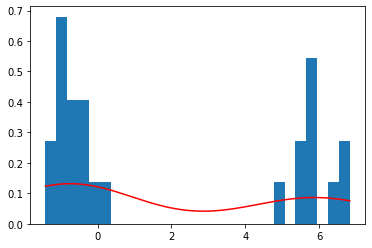

In [62]:
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(y, bins=28, density=True)
plt.plot(xgrid, density(xgrid), 'r-');

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. Let's create a distribution of data that is not easily summarized by a parametric distribution:

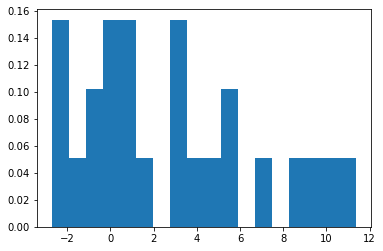

In [63]:
x1 = np.random.normal(-1,2,15)
x2 = np.random.normal(6,3,10)

x = np.r_[x1,x2]
plt.hist(x, bins=18, density=True);

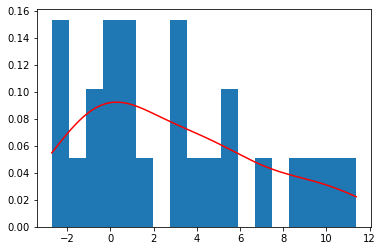

In [64]:
density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(),x.max(),200)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density(xgrid), 'r-');

## 4. Estimation
Definition: Estimation is the process of inferring the parameters (e.g. mean) of a distribution from a statistic of samples drawn from a population.

For example: What is the estimated mean $\hat{\mu}$ of the following normal data?
We can use our definition of empirical mean.

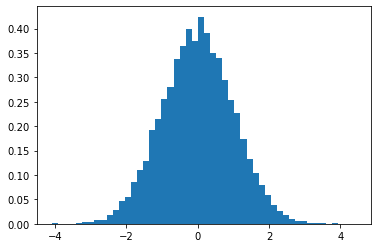

In [65]:
x = np.random.normal(0.0,1.0,10000)
a = plt.hist(x,50,density=True);

In [66]:
print('Empirical mean of the sample is', x.mean())

Empirical mean of the sample is -0.00016249642148813236


## 4.1 Sample Mean
* The process is called __estimation__ and the statistic we use __estimator__.
* The median is also an estimator (more robust to outliers).
* "Is median better than sample mean?" is a question with at least two different answers. We can use two different objectives to answer this question: the minimization of error or the maximization to get the right answer.
* If there are no outliers, we can use the __sample mean__ to minimize __mean squared error__ (where $m$ is the number of times you play the estimation game, not the size of the sample!):

$MSE = \frac{1}{m} \sum(\hat{\mu}-\mu)^2$

In [67]:
NTs=200
mu=0
var=1
err=0
NPs=1000
for i in range(NTs):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean()-mu)**2
print('MSE', err/NTs)

MSE 0.0010790717743512396


## 4.2 Variance
We can also estimate the variance with:

$\hat{\sigma^2} = \frac{1}{n} \sum_i (x_i - \mu)^2$

This estimator works for large samples, but it is biased for small samples. For small samples use:

$\hat{\sigma^2} = \frac{1}{n-1} \sum_i (x_i - \mu)^2$

## 4.3 Standard Scores
$z_i = \frac{x_i - \mu}{\sigma}$

This measure is dimensionless and its distribution has a mean of 0 and variance of 1.  
It inherits the "shape" of $X$: if it is normally distributed, so is $Z$. If $X$ is skewed, so is $Z$.

## 4.3 Covariance
Covariance is a measure of the tendency of two variables to vary togehter.

If we have two series $X$ and $Y$ with $X=\{x_i\}$ and $Y=\{y_i\}$, and they vary together, their deviations $x_i - \mu_X$ and $y_i - \mu_Y$ tend to have the same sign.

If we multiply them together, the product is positive, when the deviations have the same sign, and negative, when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

Covariance is the mean of the products:

$Cov(X,Y) = \frac{1}{n} \sum^{n}_{i=1} (x_i - \mu_x)*(y_i - \mu_y)$,

where n is the length of the two series.

However, it is a measure that is difficult to interpret.

In [70]:
# covariance
def Cov(X,Y):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis,dyis)])/len(X)

In [71]:
X = [5, -1, 3.3, 2.7, 12.2]
X = np.array(X)
Y = [10, 12, 8, 9, 11]

print('Cov(X,X) =%.2f' %Cov(X,X))
print('Var(X) =%.2f' %np.var(X))
print('Cov(X,Y) =%.2f' %Cov(X,Y))

Cov(X,X) =18.89
Var(X) =18.89
Cov(X,Y) =0.18


Let us create some examples of positive and negative correlations like those showing the relations of stock market with respect to the economic growth or the gasoline prices with respect to the world oil production:

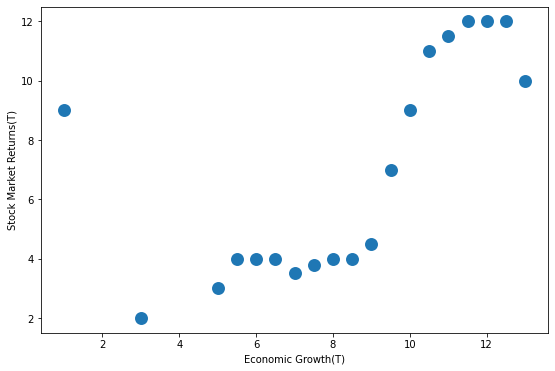

In [73]:
# correlation?
X=np.array([[1,9],[3, 2], [5,3],[5.5,4],[6,4],[6.5,4],[7,3.5],[7.5,3.8],[8,4],[8.5,4],[9,4.5],[9.5,7],[10,9],[10.5,11],[11,11.5],[11.5,12],[12,12],[12.5,12],[13,10]])
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='tab:blue',s=120,linewidth=2,zorder=10)
plt.xlabel('Economic Growth(T)')
plt.ylabel('Stock Market Returns(T)')
plt.gcf().set_size_inches((20,6));

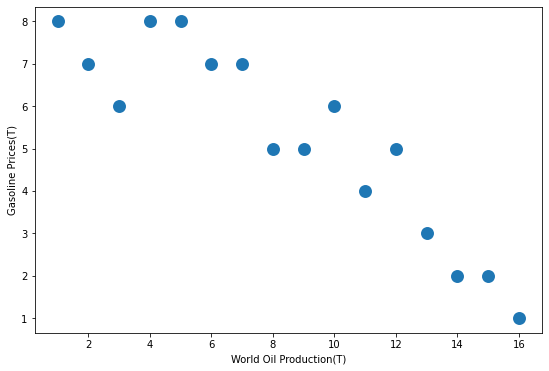

In [74]:
X=np.array([[1,8],[2, 7],[3,6],[4,8],[5,8],[6,7],[7,7],[8,5],[9,5],[10,6],[11,4],[12,5],[13,3],[14,2],[15,2],[16,1]])
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='tab:blue',s=120,linewidth=2,zorder=10)
plt.xlabel('World Oil Production(T)')
plt.ylabel('Gasoline Prices(T)')
plt.gcf().set_size_inches((20,6));

## 4.5 Pearson's Correlation
Pearson's Correlation coefficient $\rho$ is much easier to intepret and can be derived from the previous measures. The coefficient ranges between -1 and 1, expressing that two variables vary in opposite direction if the sign is negative, or vary together if the sign is positive. If $\rho$ is close to 0, then there is no correlation, but if its absolute value is above 0.6, we speak of strong correlation.

$\rho(X, Y) = \frac{1}{n} \sum^{n}_{i=1} \frac{(x_i - \mu_x)}{\sigma_x} \frac{(y_i - \mu_y)}{\sigma_y}$

It can be summarized as this:

$r(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y}$

In [75]:
def Pearson_Corr(X,Y):
    assert len(X)==len(Y)
    return Cov(X,Y)/np.prod([np.std(V) for V in [X,Y]])

In [80]:
# corr econ growth
X=np.array([[1,9],[3, 2], [5,3],[5.5,4],[6,4],[6.5,4],[7,3.5],[7.5,3.8],[8,4],[8.5,4],[9,4.5],[9.5,7],[10,9],[10.5,11],[11,11.5],[11.5,12],[12,12],[12.5,12],[13,10]])
print('Pearson Correlation r(X,X)=%.5f'% Pearson_Corr(X[:,0],X[:,1]))

Pearson Correlation r(X,X)=0.67383


In [79]:
# corr for oil
X=np.array([[1,8],[2, 7],[3,6],[4,8],[5,8],[6,7],[7,7],[8,5],[9,5],[10,6],[11,4],[12,5],[13,3],[14,2],[15,2],[16,1]])
print('Pearson Correlation r(X,X)=%.5f'% Pearson_Corr(X[:,0],X[:,1]))

Pearson Correlation r(X,X)=-0.90915


## 4.6 Spearman's Rank Correlation
Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of outliers.

Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. To compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample.

For example, in the sample {7, 1, 2, 5} the rank of the value 5 is 3, because it appears third if we sort the elements.

Then, we compute __the Pearson’s correlation, but for the ranks__.

In [81]:
def list2rank(l):
    # l is a list of numbers
    # returns a list 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

def spearmanRank(X,Y):
    assert len(X)==len(Y)
    print(list2rank(X))
    print(list2rank(Y))
    return Pearson_Corr(list2rank(X),list2rank(Y))

Pearson coefficient(X,Y)=0.28
[1.0, 2.0, 3.0, 4.0, 5.0]
[2.0, 1.0, 3.0, 5.0, 4.0]
Spearman coefficient(X,Y)=0.80


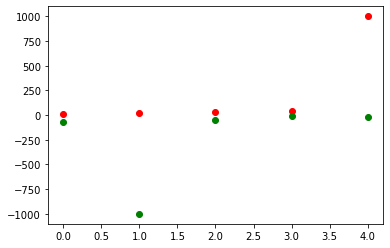

In [82]:
X = [10,20,30,40,1000]
Y = [-70,-1000,-50,-10,-20]
plt.plot(X,'ro')
plt.plot(Y,'go');
print('Pearson coefficient(X,Y)=%.2f'% Pearson_Corr(X,Y))
print('Spearman coefficient(X,Y)=%.2f'% spearmanRank(X,Y))

Obtain for the [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) with the given dataset.

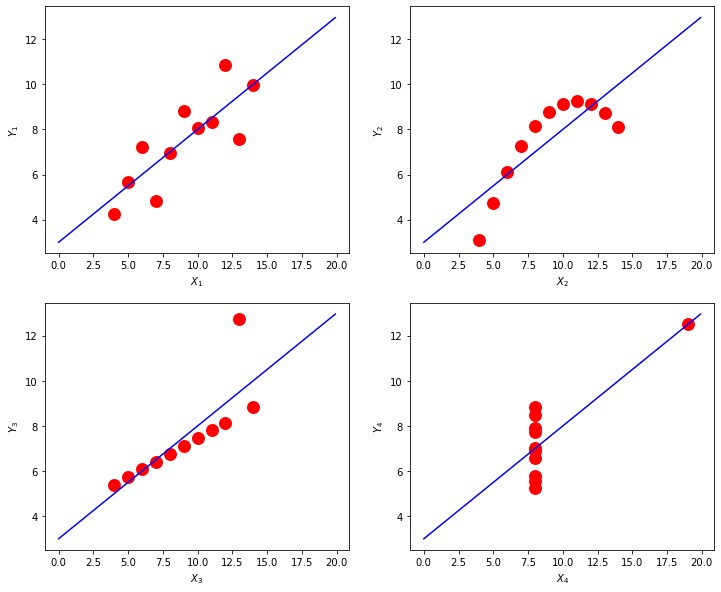

In [102]:
# Anscombe's Quartet
X=np.array([[10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58],
[8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76],
[13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71],
[9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84],
[11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47],
[14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04],
[6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25],
[4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50],
[12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56],
[7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91],
[5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89]])
XX = np.arange(0,20,0.1)
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],color='r',s=120,linewidth=2)
plt.plot(XX, (0.5* XX+3), '-b')
plt.xlabel('$X_1$')
plt.ylabel('$Y_1$')

plt.subplot(2,2,2)
plt.scatter(X[:,2],X[:,3],color='r',s=120,linewidth=2)
plt.plot(XX, (0.5*XX+3), '-b')
plt.xlabel('$X_2$')
plt.ylabel('$Y_2$')

plt.subplot(2,2,3)
plt.scatter(X[:,4],X[:,5],color='r',s=120,linewidth=2)
plt.plot(XX, (0.5* XX+3), '-b')
plt.xlabel('$X_3$')
plt.ylabel('$Y_3$')

plt.subplot(2,2,4)
plt.scatter(X[:,6],X[:,7],color='r',s=120,linewidth=2)
plt.plot(XX, (0.5* XX+3), '-b')
plt.xlabel('$X_4$')
plt.ylabel('$Y_4$')
plt.gcf().set_size_inches((12,10));

__Sources__

Igual, Laura, and Santi Seguí. "Chapter 4: Statistical Inference." In _Introduction to Data Science_, pp. 29-50. Springer, 2017.

Here is the link to the [original notebook](https://github.com/DataScienceUB/introduction-datascience-python-book/blob/master/ch03_Descriptive_Statistics.ipynb).